https://www.kaggle.com/code/krepkiioreshek/spam-classification-nlp-different-architectures

#  Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
data = pd.read_csv('SPAM_SMS.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
texts = data['Message'].values
labels = data['Category'].values

max_words = 60000
labels

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

# Turning words to tokens using Tokenizer

In [5]:
from keras.preprocessing.text import Tokenizer

In [6]:
tokenizer = Tokenizer(num_words=max_words,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,
                      split=' ',
                      char_level=False,
                      oov_token='unknown')
tokenizer.fit_on_texts(texts)

In [7]:
X = tokenizer.texts_to_matrix(texts)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Encoding Labels

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)

Y = le.fit_transform(labels)
Y

array([0, 0, 1, ..., 0, 0, 0])

#### Split Data into Train and Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Split data on train and test for embedding

In [10]:
sequences = tokenizer.texts_to_sequences(texts)
sequences = np.array(sequences)
x_train_emb, x_test_emb, y_train_emb, y_test_emb = train_test_split(sequences,Y, test_size=0.2)

#### Fully- Connected NN

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [12]:
# Dense 

model = Sequential()

model.add(BatchNormalization(input_dim = max_words))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 60000)            240000    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                3840064   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               8

In [14]:
from keras.metrics import AUC
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics =  [AUC()])

In [15]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=25)

Epoch 1/25
126/126 [==============================] - 5s 21ms/step - loss: 0.5078 - auc: 0.4812 - val_loss: 0.4976 - val_auc: 0.5346
Epoch 2/25
126/126 [==============================] - 2s 18ms/step - loss: 0.4253 - auc: 0.5532 - val_loss: 0.4040 - val_auc: 0.6660
Epoch 3/25
126/126 [==============================] - 2s 18ms/step - loss: 0.3748 - auc: 0.6752 - val_loss: 0.3347 - val_auc: 0.8108
Epoch 4/25
126/126 [==============================] - 2s 17ms/step - loss: 0.3353 - auc: 0.7652 - val_loss: 0.1950 - val_auc: 0.9030
Epoch 5/25
126/126 [==============================] - 2s 17ms/step - loss: 0.2897 - auc: 0.8434 - val_loss: 0.1518 - val_auc: 0.9429
Epoch 6/25
126/126 [==============================] - 2s 18ms/step - loss: 0.2356 - auc: 0.9035 - val_loss: 0.1439 - val_auc: 0.9521
Epoch 7/25
126/126 [==============================] - 2s 18ms/step - loss: 0.2107 - auc: 0.9216 - val_loss: 0.1341 - val_auc: 0.9566
Epoch 8/25
126/126 [==============================] - 2s 18ms/step - 

### Graph of AUC Score

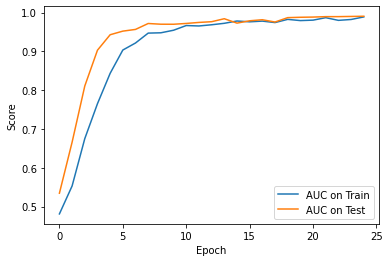

In [16]:
plt.plot(history.history['auc'], label='AUC on Train')
plt.plot(history.history['val_auc'], label='AUC on Test')
plt.xlabel("Epoch")
plt.ylabel('Score')
plt.legend();

### Model Selection

In [17]:
model.evaluate(X_test, y_test)

35/35 [==============================] - 0s 7ms/step - loss: 0.0939 - auc: 0.9701


[0.09385492652654648, 0.9700739979743958]

# Embedding + Dense NN

In [18]:
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, SpatialDropout1D, Flatten

In [19]:
max_len = 200

x_train_emb = pad_sequences(x_train_emb, maxlen=max_len)
x_test_emb = pad_sequences(x_test_emb, maxlen=max_len)

In [20]:
model = Sequential()

model.add(Embedding(max_words, 64, input_length=max_len))
model.add(SpatialDropout1D(0.25))

model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 64)          0         
 ropout1D)                                                       
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 batch_normalization_7 (Batc  (None, 12800)            51200     
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 64)                819264    
                                                                 
 dense_16 (Dense)            (None, 64)               

In [22]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics =  [AUC()])

In [23]:
history = model.fit(x_train_emb, y_train_emb, validation_split=0.1, epochs=80)

Epoch 1/80
126/126 [==============================] - 3s 14ms/step - loss: 0.4314 - auc_1: 0.5263 - val_loss: 0.5300 - val_auc_1: 0.5842
Epoch 2/80
126/126 [==============================] - 1s 12ms/step - loss: 0.4116 - auc_1: 0.5819 - val_loss: 0.4855 - val_auc_1: 0.8452
Epoch 3/80
126/126 [==============================] - 1s 12ms/step - loss: 0.3877 - auc_1: 0.6610 - val_loss: 0.4997 - val_auc_1: 0.8536
Epoch 4/80
126/126 [==============================] - 2s 12ms/step - loss: 0.3699 - auc_1: 0.7181 - val_loss: 0.5151 - val_auc_1: 0.8714
Epoch 5/80
126/126 [==============================] - 2s 13ms/step - loss: 0.3599 - auc_1: 0.7453 - val_loss: 0.5008 - val_auc_1: 0.8830
Epoch 6/80
126/126 [==============================] - 1s 12ms/step - loss: 0.3454 - auc_1: 0.7766 - val_loss: 0.5748 - val_auc_1: 0.8159
Epoch 7/80
126/126 [==============================] - 1s 11ms/step - loss: 0.3372 - auc_1: 0.7970 - val_loss: 0.5923 - val_auc_1: 0.8277
Epoch 8/80
126/126 [=====================

126/126 [==============================] - 1s 11ms/step - loss: 0.0753 - auc_1: 0.9854 - val_loss: 0.5062 - val_auc_1: 0.9722
Epoch 61/80
126/126 [==============================] - 1s 11ms/step - loss: 0.0629 - auc_1: 0.9888 - val_loss: 0.1988 - val_auc_1: 0.9690
Epoch 62/80
126/126 [==============================] - 2s 12ms/step - loss: 0.0872 - auc_1: 0.9810 - val_loss: 0.1371 - val_auc_1: 0.9740
Epoch 63/80
126/126 [==============================] - 2s 12ms/step - loss: 0.0813 - auc_1: 0.9844 - val_loss: 0.1522 - val_auc_1: 0.9765
Epoch 64/80
126/126 [==============================] - 2s 12ms/step - loss: 0.0661 - auc_1: 0.9874 - val_loss: 0.2023 - val_auc_1: 0.9735
Epoch 65/80
126/126 [==============================] - 2s 12ms/step - loss: 0.0681 - auc_1: 0.9879 - val_loss: 0.3425 - val_auc_1: 0.9649
Epoch 66/80
126/126 [==============================] - 1s 12ms/step - loss: 0.0611 - auc_1: 0.9889 - val_loss: 0.3034 - val_auc_1: 0.9635
Epoch 67/80
126/126 [=========================

### Model Evaluation

In [24]:
model.evaluate(x_test_emb, y_test_emb)

35/35 [==============================] - 0s 5ms/step - loss: 0.1220 - auc_1: 0.9881


[0.12196095287799835, 0.9881206154823303]

### Grapth of AUC Score

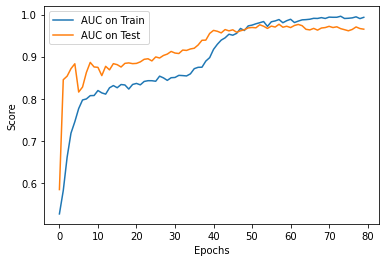

In [26]:
plt.plot(history.history['auc_1'], label='AUC on Train')
plt.plot(history.history['val_auc_1'], label='AUC on Test')

plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend();

### Embedding + LSTM NN

In [27]:
from keras.layers import LSTM, Bidirectional

In [28]:
mdoel = Sequential()

model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.25))

model.add(BatchNormalization())
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 64)          0         
 ropout1D)                                                       
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 batch_normalization_7 (Batc  (None, 12800)            51200     
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 64)                819264    
                                                                 
 dense_16 (Dense)            (None, 64)               

In [30]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[AUC()])

In [31]:
history = model.fit(x_train_emb, y_train_emb, validation_split=0.1, epochs=25)

Epoch 1/25
126/126 [==============================] - 10s 30ms/step - loss: 0.5432 - auc_2: 0.4872 - val_loss: 0.5965 - val_auc_2: 0.5000
Epoch 2/25
126/126 [==============================] - 2s 18ms/step - loss: 0.4540 - auc_2: 0.4884 - val_loss: 0.5776 - val_auc_2: 0.5000
Epoch 3/25
126/126 [==============================] - 2s 18ms/step - loss: 0.4375 - auc_2: 0.5175 - val_loss: 0.5592 - val_auc_2: 0.5000
Epoch 4/25
126/126 [==============================] - 2s 19ms/step - loss: 0.4387 - auc_2: 0.5024 - val_loss: 0.4919 - val_auc_2: 0.5000
Epoch 5/25
126/126 [==============================] - 2s 19ms/step - loss: 0.4349 - auc_2: 0.5079 - val_loss: 0.4654 - val_auc_2: 0.5000
Epoch 6/25
126/126 [==============================] - 3s 20ms/step - loss: 0.4400 - auc_2: 0.4893 - val_loss: 0.4958 - val_auc_2: 0.5000
Epoch 7/25
126/126 [==============================] - 2s 18ms/step - loss: 0.4301 - auc_2: 0.5098 - val_loss: 0.4918 - val_auc_2: 0.5000
Epoch 8/25
126/126 [====================

In [32]:
model.evaluate(x_test_emb, y_test_emb)

35/35 [==============================] - 0s 8ms/step - loss: 0.4874 - auc_2: 0.5000


[0.48741352558135986, 0.5]

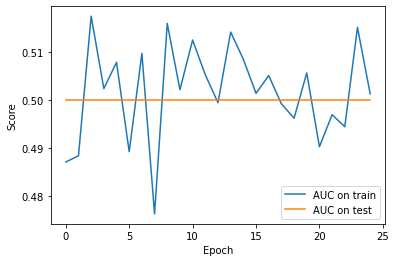

In [34]:
plt.plot(history.history['auc_2'], label='AUC on train')
plt.plot(history.history['val_auc_2'],  label='AUC on test')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.show()